In [2]:
# installing library of the book
!pip install d2l==0.16.2

     |████████████████████████████████| 81kB 3.9MB/s 


In [3]:
# importing libraries
import random
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# generating synthetic datasets
# generating 1000 datapoints where true model parameters are w=[2, -3.4] and b=4.2
# defining function to generate data
def synthetic_data(w, b, num_samples ):
  x = torch.normal(0, 1, (num_samples, len(w)))
  # without noise
  y = torch.matmul(x, w) + b
  # adding gauasian noise 
  y += torch.normal(0, 0.01, y.shape) 
  return x, y.reshape((-1, 1))


In [5]:
true_w = torch.Tensor([2, -3.4])
true_b = 4.2
num_samples = 1000 
Features, labels = synthetic_data(true_w, true_b, num_samples)

In [6]:
# printing features & lables
print(f'Features: {Features[0,:]}')
print(f'Label: {labels[0]}')

Features: tensor([-0.0633, -0.1622])
Label: tensor([4.6367])


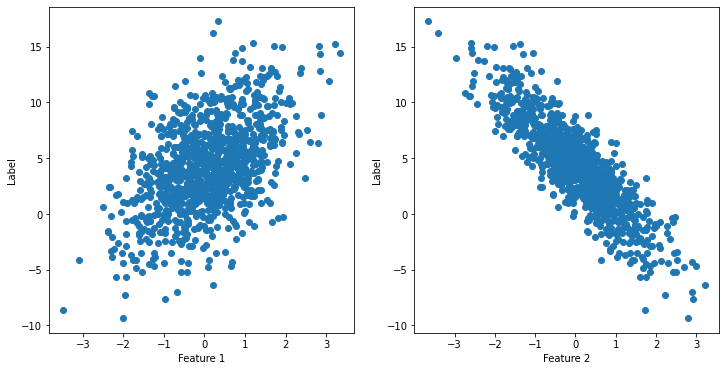

In [7]:
# plotting all datapoints
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(Features[:, 0], labels)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Label')
ax2.scatter(Features[:, 1], labels)
ax2.set_xlabel('Feature 2')
ax2.set_ylabel('Label')
plt.show()
plt.close()


In [8]:
# iterating over the minibatches
# generating minibatches
def data_iter(batch_size, features, labels):
  num_samples = len(features)
  indices = list(range(num_samples))
  random.shuffle(indices)
  for i in range(0, num_samples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i+batch_size, num_samples)])
    yield features[batch_indices], labels[batch_indices]

In [9]:
batch_size = 10
for x,y in data_iter(batch_size, Features, labels):
  print(x, '\n', y)
  print(x.shape)
  print(y.shape)
  break

tensor([[-0.4270, -0.7270],
        [ 0.9233,  0.6708],
        [-0.4007,  1.2550],
        [ 0.6412,  1.3493],
        [ 0.7442, -0.2726],
        [ 0.3403,  0.2842],
        [ 0.5094,  1.5450],
        [-1.1096, -0.1533],
        [ 0.2431,  0.5122],
        [ 0.9626, -0.0985]]) 
 tensor([[ 5.8098],
        [ 3.7791],
        [-0.8713],
        [ 0.8871],
        [ 6.6037],
        [ 3.9105],
        [-0.0278],
        [ 2.5080],
        [ 2.9614],
        [ 6.4568]])
torch.Size([10, 2])
torch.Size([10, 1])


In [10]:
# initializing model parameters
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


In [11]:
# defining model
def lin_reg(x, w, b):
  return torch.matmul(x, w) + b

In [12]:
# defining loss function(squared loss function)
def sq_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2/2


In [13]:
# defining the optimization algorithm
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr*param.grad/batch_size
      param.grad.zero_()

In [14]:
# defining the training loop of the model
learning_rate = 0.03
num_epochs = 3
network = lin_reg
loss = sq_loss


In [15]:
# training the model
for epoch in range(num_epochs):
  for x, y in data_iter(batch_size, Features, labels):
    l = loss(network(x, w, b), y)
    l.sum().backward()
    sgd([w,b], learning_rate, batch_size)
  with torch.no_grad():
    train_1 = loss(network(Features, w, b), labels)
    print(f'epoch {epoch +1}, loss {float(train_1.mean()):}')

epoch 1, loss 0.029271606355905533
epoch 2, loss 0.000104746017314028
epoch 3, loss 5.217754005570896e-05


In [16]:
# testing the model
print( f'Error in estimatiing w: {true_w - w.reshape(true_w.shape)}')
print(f'Error in estimating b: {true_b - b}')

Error in estimatiing w: tensor([ 0.0002, -0.0002], grad_fn=<SubBackward0>)
Error in estimating b: tensor([0.0007], grad_fn=<RsubBackward1>)
